In [18]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.linear_model import LogisticRegression #for LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [19]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [20]:
df = pd.read_csv('../classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [21]:
df.shape

(155223, 19)

In [22]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [8]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [23]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

## Feature Scaling

In [9]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
2,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
3,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.0,0.705882,1.0,0.274286,0.333333,0.181818


# Train Test split

In [23]:
X = df.drop('Target',axis=1)
y = df['Target']

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X)
X_test=scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10) #train test split in 50:50 ratio

In [24]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
72242,0.000373,0.603984,0.572602,0.567164,0.611940,0.0,0.696774,0.19,0.698113,0.076923,0.26,0.784946,0.007913,0.529412,0.9,0.351429,0.333333,0.545455
10501,0.000683,0.590065,0.517799,0.746269,0.776119,0.0,0.625806,0.43,0.924528,0.032967,0.06,0.806452,0.012603,0.485294,0.9,0.474286,0.333333,0.000000
87463,0.009936,0.568957,0.560218,0.716418,0.701493,0.0,0.445161,0.97,0.849057,0.054945,0.51,0.838710,0.046014,0.544118,0.8,0.391429,0.333333,0.818182
141444,0.311837,0.697785,0.328865,0.776119,0.805970,0.0,0.625806,0.73,0.886792,0.142857,0.05,0.602151,0.000000,0.500000,1.0,0.857143,0.333333,0.181818
17935,0.001112,0.586760,0.554887,0.611940,0.567164,0.0,0.625806,0.54,0.660377,0.054945,0.20,0.752688,0.004103,0.544118,0.7,0.360000,0.333333,0.000000


# Logistic Regression

In [25]:
logic_r = LogisticRegression() 
logic_r.fit(X_train,y_train) 
prediction = logic_r.predict(X_test)

In [26]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[35354  9659]
 [20532 12067]]
0.6110008761531722
              precision    recall  f1-score   support

           0       0.63      0.79      0.70     45013
           1       0.56      0.37      0.44     32599

    accuracy                           0.61     77612
   macro avg       0.59      0.58      0.57     77612
weighted avg       0.60      0.61      0.59     77612



### K Fold Cross Validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = LogisticRegression() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.66489715 0.59163902 0.56323822 0.5554081  0.55089582 0.55495089
 0.54273958 0.38731086 0.41040616 0.50955668]
Max : 0.6648971466489715
Min : 0.3873108574462437
Mean : 0.5331042463724283


### Stratified K-fold Cross Validation

In [30]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = LogisticRegression() 
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.4953713939849589


In [31]:
scores

array([0.5421367 , 0.56987392, 0.56522893, 0.50245521, 0.53948242,
       0.55760552, 0.46018051, 0.26148128, 0.47571011, 0.47955933])

In [32]:
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

Max : 0.5698739216987392
Min : 0.26148128484204936
Mean : 0.4953713939849589


## Graphical Analysis

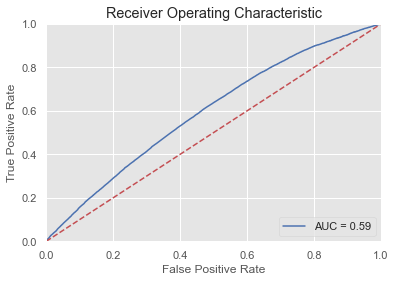

In [51]:
from sklearn.metrics import roc_curve, auc

probs               = logic_r.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning the model using grid searchCV
Logistic regression does not really have any critical hyperparameters to tune.

- Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

1. solver in ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
- Regularization (penalty) can sometimes be helpful.

2. penalty in ['none','l1', 'l2', 'elasticnet']
- Note: not all solvers support all regularization terms.

- The C parameter controls the penality strength, which can also be effective.
3. C in [100, 10, 1.0, 0.1, 0.01]

In [33]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = KFold(n_splits=10)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='accuracy',error_score=0,verbose=2)
grid_result = grid_search.fit(X_train,y_train)
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END .................C=

[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   4.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   7.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   7.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   6.6s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   5.9s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   5.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   6.2s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ................C=0

In [36]:
accuracy = grid_result.best_score_
accuracy

0.5732900025193646

In [38]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

## Model with parameters

In [17]:
log_model = LogisticRegression(C=1.0, penalty= 'l2', solver= 'liblinear') 
log_model.fit(X_train,y_train) 
log_model_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,log_model_pred))
print(accuracy_score(y_test,log_model_pred))
print(classification_report(y_test,log_model_pred))

[[35287  9726]
 [20441 12158]]
0.6113101066845333
              precision    recall  f1-score   support

           0       0.63      0.78      0.70     45013
           1       0.56      0.37      0.45     32599

    accuracy                           0.61     77612
   macro avg       0.59      0.58      0.57     77612
weighted avg       0.60      0.61      0.59     77612



## Graphical Analysis

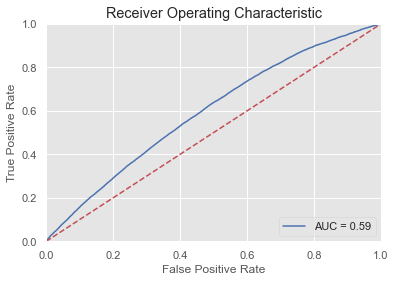

In [52]:
from sklearn.metrics import roc_curve, auc

probs               = log_model.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
print('Accuracy before tuning :',accuracy_score(y_test,prediction))
print()
print('Accuracy after tuning :',accuracy_score(y_test,log_model_pred))

Accuracy before tuning : 0.5681522575850079

Accuracy after tuning : 0.5683646112600537
